In [311]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids
from factor_analyzer import FactorAnalyzer

from prince import FAMD

import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [314]:
#finding count of missing values in each column
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

DATA PREPROCESSING


In [315]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Liver_disease']
## RENAMED RESULT AS Liver_disease
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [316]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)

#recoding Liver_disease variable - 2 means dont have disease - converted that to 0; 1 remains the same
df['Liver_disease'] = df['Liver_disease'].replace(2, 0)
print(df["Liver_disease"].unique())

[1 2]
[1 0]


In [317]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()
df['is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')
df =  df.rename(columns={'is_male':'Gender'}, inplace=False)

#new gender column where male=1 and female=0

In [318]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease,Gender
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [319]:
#dropping null values - does not affect data
df = df.dropna()

In [320]:
#finding count of missing values in each column
df.isna().sum()

Age                                     0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Liver_disease                           0
Gender                                  0
dtype: int64

In [321]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [322]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease,Gender
count,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000
mean,44.104460,3.408686,1.541379,289.851876,81.295489,112.209788,6.472201,3.124680,0.943883,0.716873,0.760862
std,15.972032,6.343109,2.894564,239.188932,181.567045,285.494878,1.082415,0.791945,0.323851,0.450526,0.467635
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,2.000000


In [323]:
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total persons with liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons without liver disease :  7833 and its percentage is 28.31 %
Total persons with liver disease :  19833 and its percentage is 71.69 %


DATA SET IS UNBALANCED WE HATE TO APPLY SMOTE UPSAMPLING AND DOWNSAMPLING

In [324]:
df.skew(axis = 0, skipna = True) 

Age                                      0.020470
Total_Bilirubin                          4.663518
Direct_Bilirubin                         3.144359
Alkphos_Alkaline_Phosphotase             3.764795
Sgpt_Alamine_Aminotransferase            6.517181
Sgot_Aspartate_Aminotransferase         10.358753
Total_Protiens                          -0.304125
ALB_Albumin                             -0.046914
A/G_Ratio_Albumin_and_Globulin_Ratio     1.076229
Liver_disease                           -0.962823
Gender                                  -0.670711
dtype: float64

TEST TRAIN SPLIT

In [325]:
X = df.drop(columns=['Liver_disease'])
y = df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [326]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

APPLYING DOWNSAMPLING

In [327]:
import numpy as np
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = X_train[y_train == 1]
minority_class = X_train[y_train == 0]

# Print sizes of majority and minority classes before upsampling
print("Size of majority class before downsampling:", majority_class.shape[0])
print("Size of minority class before downsampling:", minority_class.shape[0])

# Now you can use X_upsampled and y_upsampled for training your model

Size of majority class before downsampling: 15855
Size of minority class before downsampling: 6277


In [328]:
from sklearn.utils import resample


# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,     # Sample without replacement
                                n_samples=minority_class.shape[0],  # Match number in minority class
                                random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
X_downsampled = np.vstack([minority_class, majority_downsampled])
y_downsampled = np.concatenate([np.zeros(minority_class.shape[0]), np.ones(minority_class.shape[0])])

# Shuffle the data
shuffle_indices = np.arange(len(X_downsampled))
np.random.shuffle(shuffle_indices)
X_downsampled = X_downsampled[shuffle_indices]
y_downsampled = y_downsampled[shuffle_indices]



# Print the class counts after downsampling
unique_classes, class_counts = np.unique(y_downsampled, return_counts=True)
print("Class counts after downsampling:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {int(cls)}: {count}")

# Now you can use X_downsampled and y_downsampled for training your model


Class counts after downsampling:
Class 0: 6277
Class 1: 6277


In [329]:
# Now you can use X_upsampled and y_upsampled for training your model

#class distribution before and after DOWNSAMPLING



X_resampled_train = pd.DataFrame(X_downsampled)
y_resampled_train = pd.DataFrame(y_downsampled)


print("Before DOWNSAMPLING:")
print(np.unique(y_train, return_counts=True))
print("After DOWNSAMPLING:")
print(np.unique(y_resampled_train, return_counts=True))

Before DOWNSAMPLING:
(array([0, 1], dtype=int64), array([ 6277, 15855], dtype=int64))
After DOWNSAMPLING:
(array([0., 1.]), array([6277, 6277], dtype=int64))


In [330]:
import numpy as np

# Class distribution before upsampling
print("Before Upsampling:")
unique_labels_before, counts_before = np.unique(y_train, return_counts=True)
total_persons_no_liver_disease_before = counts_before[0]
total_persons_with_liver_disease_before = counts_before[1]
print("Total persons without liver disease:", total_persons_no_liver_disease_before)
print("Total persons with liver disease:", total_persons_with_liver_disease_before)

# Class distribution after upsampling
print("After Upsampling:")
unique_labels_after, counts_after = np.unique(y_resampled_train, return_counts=True)
total_persons_no_liver_disease_after = counts_after[0]
total_persons_with_liver_disease_after = counts_after[1]
print("Total persons without liver disease:", total_persons_no_liver_disease_after)
print("Total persons with liver disease:", total_persons_with_liver_disease_after)


Before Upsampling:
Total persons without liver disease: 6277
Total persons with liver disease: 15855
After Upsampling:
Total persons without liver disease: 6277
Total persons with liver disease: 6277


In [331]:
X_train_shape = X_train.shape
print("Shape of X_train:", X_train_shape)
y_train_shape = y_train.shape
print("Shape of X_train:", y_train_shape)



Shape of X_train: (22132, 10)
Shape of X_train: (22132,)


In [332]:
X_resampled_train = pd.DataFrame(X_downsampled)
y_resampled_train = pd.DataFrame(y_downsampled)
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)



Shape of X_resampled_train: (12554, 10)
Shape of y_resampled_train: (12554, 1)


In [333]:
X_train_shape = X_train.shape
print("Shape of X_train:", X_train_shape)
y_train_shape = y_train.shape
print("Shape of y_train:", y_train_shape)
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)




Shape of X_train: (22132, 10)
Shape of y_train: (22132,)
Shape of X_resampled_train: (12554, 10)
Shape of y_resampled_train: (12554, 1)


In [336]:
# Assuming X_resampled_train and X_train are your DataFrames
X_resampled_train.columns = X_train.columns
print("Size of X_resampled_train:", X_resampled_train.shape)
X_resampled_train




Size of X_resampled_train: (12554, 10)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender
0,37.0,0.7,0.2,189.0,22.0,43.0,7.4,3.1,0.7,1.0
1,38.0,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9,1.0
2,45.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0,1.0
3,38.0,0.9,0.3,901.0,23.0,17.0,6.2,3.5,1.2,1.0
4,18.0,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
12549,61.0,2.2,1.0,271.0,45.0,52.0,6.1,2.9,0.9,1.0
12550,55.0,0.8,0.2,192.0,28.0,35.0,6.9,3.4,0.9,0.0
12551,26.0,0.9,0.3,462.0,70.0,82.0,6.2,3.1,1.0,1.0
12552,40.0,0.9,0.3,159.0,24.0,25.0,6.9,4.4,1.7,1.0


APPLYING PCA

In [338]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender
19285,32.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0,1
18753,43.0,7.5,4.3,149.0,94.0,92.0,6.3,3.1,0.9,0
9324,28.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.1,1
14080,60.0,1.1,0.3,215.0,46.0,350.0,6.9,3.0,0.7,0
1640,75.0,2.0,1.1,226.0,33.0,135.0,6.0,2.7,0.8,1
...,...,...,...,...,...,...,...,...,...,...
8130,66.0,1.2,0.4,160.0,20.0,22.0,6.2,3.0,0.9,1
24970,35.0,2.0,1.4,2110.0,48.0,89.0,6.2,3.0,0.9,1
28947,35.0,0.9,0.2,182.0,29.0,82.0,7.1,3.7,1.0,1
4914,48.0,2.1,1.3,480.0,38.0,22.0,6.5,3.0,0.8,1


In [339]:
X_resampled_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender
0,37.0,0.7,0.2,189.0,22.0,43.0,7.4,3.1,0.7,1.0
1,38.0,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9,1.0
2,45.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0,1.0
3,38.0,0.9,0.3,901.0,23.0,17.0,6.2,3.5,1.2,1.0
4,18.0,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
12549,61.0,2.2,1.0,271.0,45.0,52.0,6.1,2.9,0.9,1.0
12550,55.0,0.8,0.2,192.0,28.0,35.0,6.9,3.4,0.9,0.0
12551,26.0,0.9,0.3,462.0,70.0,82.0,6.2,3.1,1.0,1.0
12552,40.0,0.9,0.3,159.0,24.0,25.0,6.9,4.4,1.7,1.0


In [340]:
X_train=X_resampled_train

In [341]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender
0,37.0,0.7,0.2,189.0,22.0,43.0,7.4,3.1,0.7,1.0
1,38.0,0.7,0.1,162.0,52.0,41.0,5.2,2.5,0.9,1.0
2,45.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0,1.0
3,38.0,0.9,0.3,901.0,23.0,17.0,6.2,3.5,1.2,1.0
4,18.0,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
12549,61.0,2.2,1.0,271.0,45.0,52.0,6.1,2.9,0.9,1.0
12550,55.0,0.8,0.2,192.0,28.0,35.0,6.9,3.4,0.9,0.0
12551,26.0,0.9,0.3,462.0,70.0,82.0,6.2,3.1,1.0,1.0
12552,40.0,0.9,0.3,159.0,24.0,25.0,6.9,4.4,1.7,1.0


In [350]:
y_train=y_resampled_train

In [351]:
X_train=X_resampled_train

In [352]:
X_train_shape = X_train.shape
print("Shape of X_train:", X_train_shape)
y_train_shape = y_train.shape
print("Shape of y_train:", y_train_shape)
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)




Shape of X_train: (12554, 10)
Shape of y_train: (12554, 1)
Shape of X_resampled_train: (12554, 10)
Shape of y_resampled_train: (12554, 1)


In [353]:
# Get column names of the training set
train_columns = X_train.columns

# Print the column names
print("Column names of the train set:")
print(train_columns)


Column names of the train set:
Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')


In [354]:
vars_to_apply_pca = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio']
vars_not_to_apply_pca = [col for col in X_train.columns if col not in vars_to_apply_pca]


In [355]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(28)

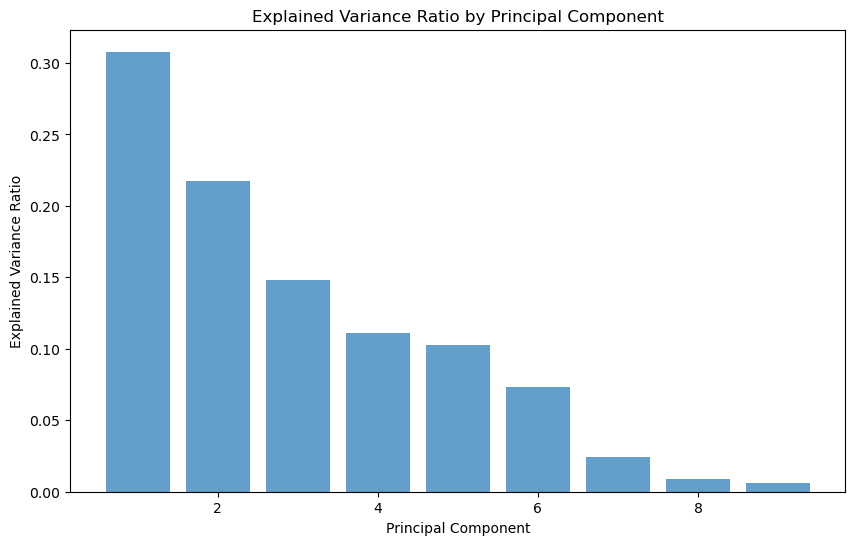

In [356]:
X_train_pca = X_train[vars_to_apply_pca]
scaler = StandardScaler()
X_train_pca_standardized = scaler.fit_transform(X_train_pca)

pca = PCA()
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)
explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

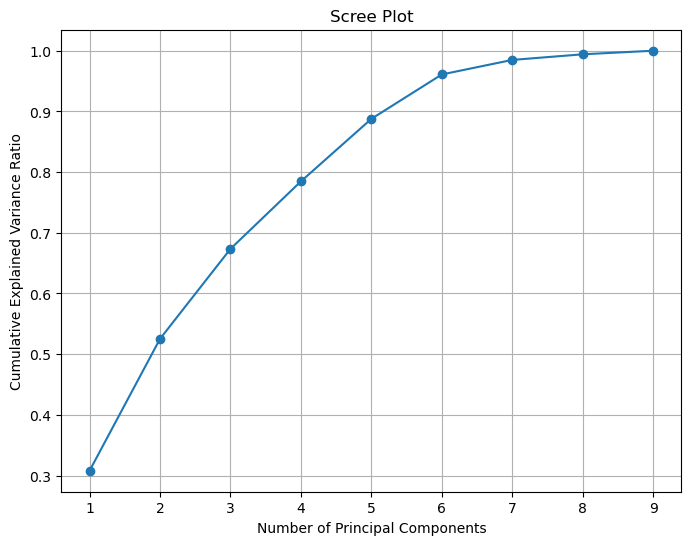

In [357]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [358]:
pca = PCA(n_components=5)
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)

# Create DataFrame for X_train_pca_transformed with the index of X_train
X_train_new = pd.DataFrame(data=X_train_pca_transformed, columns=['PC1', 'PC2','PC3','PC4','PC5'], index=X_train.index)
X_train_new[vars_not_to_apply_pca] = X_resampled_train[vars_not_to_apply_pca]

In [359]:
X_test_pca = X_test[vars_to_apply_pca]
scaler = StandardScaler()
X_test_pca_standardized = scaler.fit_transform(X_test_pca)


# Apply the same PCA transformation on the standardized test set
X_test_pca_transformed = pca.transform(X_test_pca_standardized)

# Create DataFrame for X_test_pca_transformed with the index of X_test
X_test_new = pd.DataFrame(data=X_test_pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'], index=X_test.index)
X_test_new[vars_not_to_apply_pca] = X_test[vars_not_to_apply_pca]


In [360]:
print("X_train_new Shape: {}".format(X_train_new.shape))
print("X_test_new Shape: {}".format(X_test_new.shape))

print("y_train_new Shape: {}".format(y_train.shape))
print("y_test_new Shape: {}".format(y_test.shape))

X_train_new Shape: (12554, 6)
X_test_new Shape: (5534, 6)
y_train_new Shape: (12554, 1)
y_test_new Shape: (5534,)


In [361]:
X_train_new

,PC1,PC2,PC3,PC4,PC5,Gender
0,-0.487643,-0.323908,-0.117147,-0.421763,0.328683,1.0
1,0.119965,-1.433223,0.614275,-0.356946,-0.631320,1.0
2,-0.930848,0.314342,-0.098463,0.103135,-0.067276,1.0
3,-0.080350,0.112102,-0.225726,-0.733089,2.338200,1.0
4,-1.177698,0.983479,-0.634766,-1.585793,0.136188,1.0
...,...,...,...,...,...,...
12549,0.145028,-0.605172,0.059859,1.039240,0.106013,1.0
12550,-0.705921,-0.132135,0.008765,0.698177,0.162071,0.0
12551,-0.026549,-0.273045,0.259705,-1.253071,0.672750,1.0
12552,-2.090864,1.422301,-0.091909,-0.193627,-0.735729,1.0


In [362]:
X_test_new

,PC1,PC2,PC3,PC4,PC5,Gender
29514,3.615335,-1.346111,-1.615615,-0.059916,0.625844,1
16082,-0.967130,-0.075187,0.109912,-0.460523,-0.419240,0
9359,-0.688618,-0.727698,0.650560,1.346418,-1.019778,1
22005,-1.243385,1.144834,0.163323,-1.332071,0.156510,1
27739,3.087495,0.579433,-0.258975,0.960046,0.595181,1
...,...,...,...,...,...,...
663,1.926168,-1.990532,0.423071,0.547569,1.990437,1
30061,0.841608,-0.794086,-0.213520,1.299161,0.342136,0
28957,-1.396438,1.790376,-0.068871,-0.417044,0.794053,1
9382,1.855019,-1.254523,-0.813607,0.797136,-0.283522,1


In [363]:
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)



Shape of X_resampled_train: (12554, 10)
Shape of y_resampled_train: (12554, 1)


In [364]:
X_resampled_train=X_train_new
X_test=X_test_new

In [365]:
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)



Shape of X_resampled_train: (12554, 6)
Shape of y_resampled_train: (12554, 1)


In [366]:
X_resampled_train

,PC1,PC2,PC3,PC4,PC5,Gender
0,-0.487643,-0.323908,-0.117147,-0.421763,0.328683,1.0
1,0.119965,-1.433223,0.614275,-0.356946,-0.631320,1.0
2,-0.930848,0.314342,-0.098463,0.103135,-0.067276,1.0
3,-0.080350,0.112102,-0.225726,-0.733089,2.338200,1.0
4,-1.177698,0.983479,-0.634766,-1.585793,0.136188,1.0
...,...,...,...,...,...,...
12549,0.145028,-0.605172,0.059859,1.039240,0.106013,1.0
12550,-0.705921,-0.132135,0.008765,0.698177,0.162071,0.0
12551,-0.026549,-0.273045,0.259705,-1.253071,0.672750,1.0
12552,-2.090864,1.422301,-0.091909,-0.193627,-0.735729,1.0


In [367]:
y_resampled_train

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
12549,0.0
12550,0.0
12551,1.0
12552,0.0


FITTING MODELS

LOGISTIC REGRESSION

In [368]:
print("X_train_new Shape: {}".format(X_train_new.shape))
print("X_test_new Shape: {}".format(X_test_new.shape))

print("y_train_new Shape: {}".format(y_train.shape))
print("y_test_new Shape: {}".format(y_test.shape))

X_train_new Shape: (12554, 6)
X_test_new Shape: (5534, 6)
y_train_new Shape: (12554, 1)
y_test_new Shape: (5534,)


In [369]:
X_resampled_train_shape = X_resampled_train.shape
print("Shape of X_resampled_train:", X_resampled_train_shape)
y_resampled_train_shape = y_resampled_train.shape
print("Shape of y_resampled_train:", y_resampled_train_shape)



Shape of X_resampled_train: (12554, 6)
Shape of y_resampled_train: (12554, 1)


In [371]:
X_resampled_train
y_resampled_train

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
12549,0.0
12550,0.0
12551,1.0
12552,0.0


In [372]:
np.random.seed(21)
lr = LogisticRegression()
result = lr.fit(X_resampled_train,y_resampled_train)
y_pred = lr.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  59.5 %
Misclassification rate of this model:  40.5 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.403     0.916     0.560      1556
           1      0.935     0.469     0.625      3978

    accuracy                          0.595      5534
   macro avg      0.669     0.693     0.592      5534
weighted avg      0.785     0.595     0.607      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1426 |                  130 |
+-----------------+----------------------+----------------------+
| Actual Positive |                 2111 |                 1867 |
+-----------------+----------------------+----------------------+


SVM

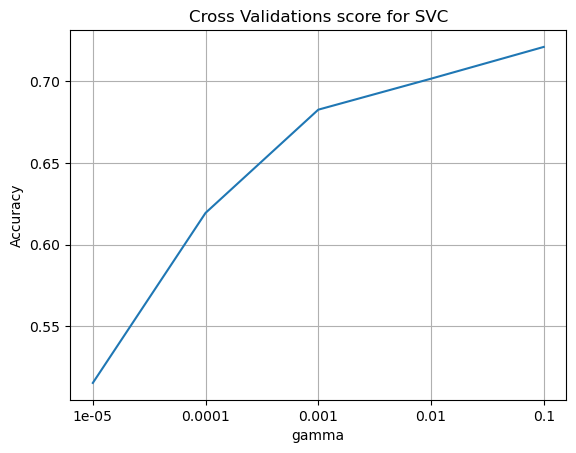

In [373]:
g = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hist = []
for val in g:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X_resampled_train, y_resampled_train, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in g], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [382]:
svm = SVC(kernel= "linear",C=0.025, random_state = 0 , gamma=0.00001)
svm.fit(X_resampled_train,y_resampled_train)
y_pred = svm.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  56.14 %
Misclassification rate of this model:  43.86 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.387     0.961     0.552      1556
           1      0.964     0.405     0.570      3978

    accuracy                          0.561      5534
   macro avg      0.676     0.683     0.561      5534
weighted avg      0.802     0.561     0.565      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1496 |                   60 |
+-----------------+----------------------+----------------------+
| Actual Positive |                 2367 |                 1611 |
+-----------------+----------------------+----------------------+


DECISION TREE

In [374]:
dt = DecisionTreeClassifier(random_state=28)
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.9622416744808897


In [384]:
dtree = DecisionTreeClassifier(max_depth = None,  min_samples_split = 3, min_samples_leaf = 1, max_features = 'auto') 
dtree.fit(X_resampled_train,y_resampled_train)
y_pred = dtree.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  73.15 %
Misclassification rate of this model:  26.85 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.519     0.600     0.557      1556
           1      0.833     0.783     0.807      3978

    accuracy                          0.731      5534
   macro avg      0.676     0.691     0.682      5534
weighted avg      0.745     0.731     0.737      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  933 |                  623 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  863 |                 3115 |
+-----------------+----------------------+----------------------+


RANDOM FOREST

In [375]:
np.random.seed(28)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 70}
0.9890071256193863


In [385]:
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=3, random_state=28)
rf.fit(X_resampled_train,y_resampled_train)
y_pred = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  80.74 %
Misclassification rate of this model:  19.26 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.645     0.699     0.671      1556
           1      0.878     0.850     0.864      3978

    accuracy                          0.807      5534
   macro avg      0.762     0.774     0.767      5534
weighted avg      0.813     0.807     0.810      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1088 |                  468 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  598 |                 3380 |
+-----------------+----------------------+----------------------+


XGB

In [376]:
np.random.seed(28)

xgb_classifier = xgb.XGBClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100,120,150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
Best Score: 0.9996813700990541


In [386]:
xgb_classifier = XGBClassifier(n_estimators=90, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state=28)
xgb_classifier.fit(X_resampled_train, y_resampled_train)
# Train the classifier
xgb_classifier.fit(X_resampled_train, y_resampled_train)

# Predict labels for test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = round(metrics.accuracy_score(y_test, y_pred_xgb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Calculate misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred_xgb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  75.93 %
Misclassification rate of this model:  24.07 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.558     0.690     0.617      1556
           1      0.866     0.786     0.824      3978

    accuracy                          0.759      5534
   macro avg      0.712     0.738     0.721      5534
weighted avg      0.780     0.759     0.766      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1074 |                  482 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  850 |                 3128 |
+-----------------+----------------------+----------------------+


KNN

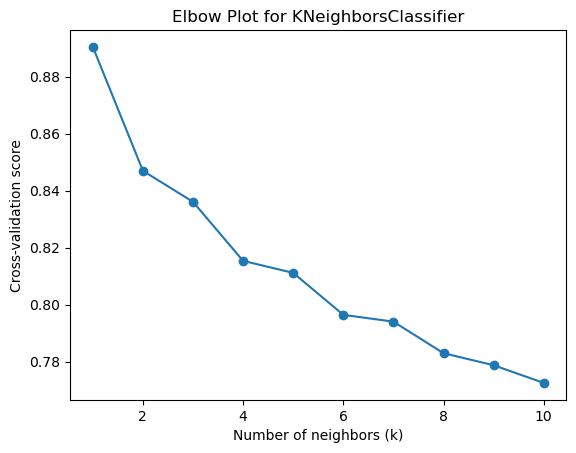

In [377]:
scores = []

k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_resampled_train, y_resampled_train, cv=5)
    scores.append(score.mean())

plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Cross-validation score')
plt.title('Elbow Plot for KNeighborsClassifier')
plt.show()

In [387]:
np.random.seed(28)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_resampled_train,y_resampled_train)
y_pred = knn.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  71.99 %
Misclassification rate of this model:  28.01 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.501     0.904     0.645      1556
           1      0.945     0.648     0.769      3978

    accuracy                          0.720      5534
   macro avg      0.723     0.776     0.707      5534
weighted avg      0.820     0.720     0.734      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1407 |                  149 |
+-----------------+----------------------+----------------------+
| Actual Positive |                 1401 |                 2577 |
+-----------------+----------------------+----------------------+


In [ ]:
ADB

In [378]:
np.random.seed(28)

ada_classifier = AdaBoostClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_resampled_train, y_resampled_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.7832563334872378


In [388]:
ada_classifier = AdaBoostClassifier(n_estimators=150, learning_rate=1.0, algorithm='SAMME.R', random_state=28)

ada_classifier.fit(X_resampled_train, y_resampled_train)

y_pred_ada = ada_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  65.79 %
Misclassification rate of this model:  34.21 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.447     0.909     0.599      1556
           1      0.940     0.560     0.702      3978

    accuracy                          0.658      5534
   macro avg      0.694     0.734     0.650      5534
weighted avg      0.802     0.658     0.673      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1415 |                  141 |
+-----------------+----------------------+----------------------+
| Actual Positive |                 1752 |                 2226 |
+-----------------+----------------------+----------------------+


In [ ]:
GB

In [380]:
np.random.seed(28)

gb_classifier = GradientBoostingClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_resampled_train, y_resampled_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9819177769209899


In [389]:
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth = 5, random_state=28)
gb_classifier.fit(X_resampled_train, y_resampled_train)
y_pred = gb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  75.21 %
Misclassification rate of this model:  24.79 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.553     0.621     0.585      1556
           1      0.844     0.803     0.823      3978

    accuracy                          0.752      5534
   macro avg      0.698     0.712     0.704      5534
weighted avg      0.762     0.752     0.756      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  967 |                  589 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  783 |                 3195 |
+-----------------+----------------------+----------------------+


MLP

In [381]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_resampled_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  74.79 %
Misclassification rate of this model:  25.21 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.532     0.860     0.657      1556
           1      0.928     0.704     0.801      3978

    accuracy                          0.748      5534
   macro avg      0.730     0.782     0.729      5534
weighted avg      0.817     0.748     0.760      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1338 |                  218 |
+-----------------+----------------------+----------------------+
| Actual Positive |                 1177 |                 2801 |
+-----------------+----------------------+----------------------+
